- Data loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv("winequalityN.csv")
df = dataset.copy()
df.shape

(6497, 13)

In [ ]:
# Supprimer les colonnes doubles
df.drop_duplicates(inplace=True)
df.shape

(5329, 13)


### A- Nan-Elimination: dropna ()Â 


In [ ]:
df = df.dropna()

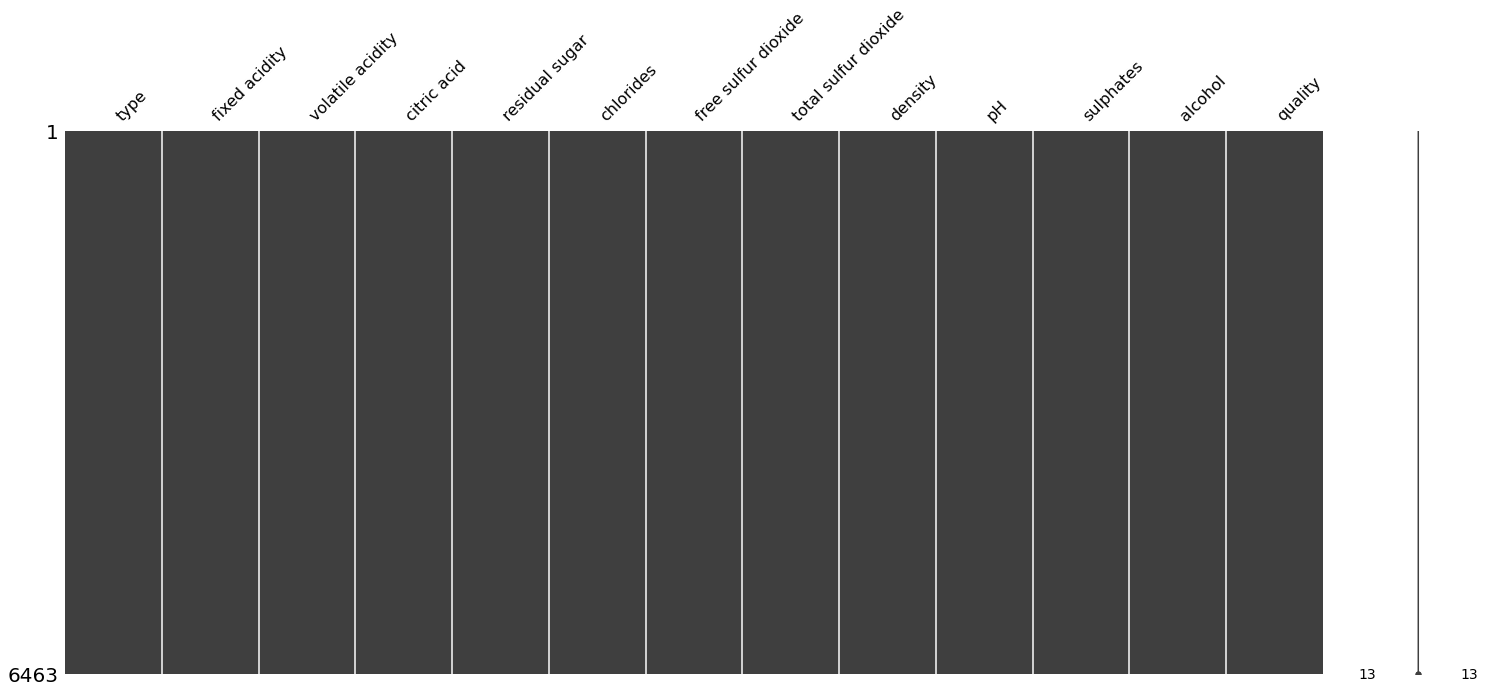

In [ ]:
import missingno as msno
msno.matrix(df);

In [ ]:
df.shape

(6463, 13)

### B -Encoding

#### - Transformation of the `type` and `quality` column

In [ ]:
df['type'] = df['type'].replace(['white','red'], [1,0])

In [ ]:
def niv_qualite(qualite):
    '''Cette fonction a pour but de classer les vins, suivant les trois niveaux de qualite'''
    if (qualite <=4):
        return "Faible"
    elif (qualite>4) & (qualite<=7):
        return "Moyen"
    elif (qualite>7) and (qualite<=10):
        return "Excellent"

#### Now I will use the map() function to apply this function to the variable `quality`.

In [ ]:
df['quality']=df['quality'].map(niv_qualite)

In [ ]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
4     1            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol quality  
0       0.45      8.8   Moyen  
1       0.49      9.5   Moyen  
2       0.44     10.1   Moyen  
3       0.40      9.9   Moyen  
4       0.40      9.9   Moyen

* Now to make calculations, we need numerical data. So we are going to codify our three quality levels by numerical order.
  - 1 ==> Low
  - 2 ==> Average
  - 3 ==> Excellent

In [ ]:
df['quality'] = df['quality'].replace(['Faible','Moyen','Excellent'], [1,2,3])
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
4     1            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        2  
1       0.49      9.5        2  
2       0.44     10.1        2  
3       0.40      9.9        2  
4       0.40      9.9        2


### C - Train set creation / Test set


##### Split dataset

In [ ]:
X = df.drop(['quality'], axis = 1)
y = df['quality']

#### Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### D - Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Model baseline

In [ ]:
from sklearn.dummy import DummyClassifier

baseline_model = DummyClassifier()
baseline_model.fit(X_train, y_train)
baseline_model.score(X_test, y_test) # accuracy

0.8824257425742574

# E - Model training

In [ ]:
# Construction du modele
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


classifier = [
    KNeighborsClassifier(),
    LogisticRegression(
         multi_class='multinomial',
        random_state=28
    ),
    SVC(
        random_state=28, 
        probability=True
    ),
    DecisionTreeClassifier(
        random_state=28, 
        max_depth=4
    ),
    RandomForestClassifier(
        n_estimators=10,
        random_state=28, 
        max_depth=4, 
        class_weight='balanced'
    )
]
models = []
for classifier in classifier:
    classifier.fit(X_train, y_train)
    print(f"{classifier.__class__.__name__:22}: Entraine")
    models.append(classifier)

KNeighborsClassifier  : Entraine
LogisticRegression    : Entraine
SVC                   : Entraine
DecisionTreeClassifier: Entraine
RandomForestClassifier: Entraine


### F - Evaluation of the different models

## Accuracy calculation
* Accuracy : It is the number of correct predictions on the total number of observations
* Formula : TP + TN / (TP + FP + TN + FN)

In [ ]:
from sklearn.metrics import accuracy_score

for model in models:
    y_pred = model.predict(X_test)
    print(
    f"{model.__class__.__name__:22}: Accuracy = {accuracy_score(y_test, y_pred)} \n"
    )

KNeighborsClassifier  : Accuracy = 0.9399752475247525 

LogisticRegression    : Accuracy = 0.9455445544554455 

SVC                   : Accuracy = 0.9449257425742574 

DecisionTreeClassifier: Accuracy = 0.9436881188118812 

RandomForestClassifier: Accuracy = 0.5556930693069307 



### Classification report

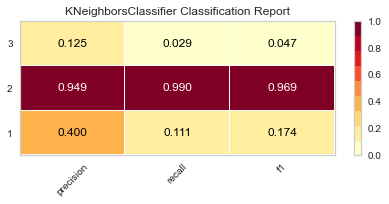

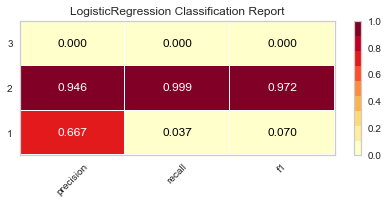

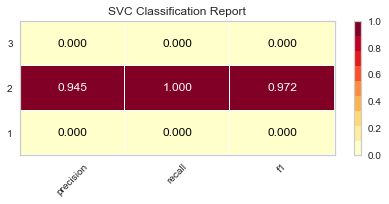

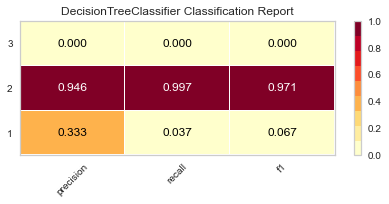

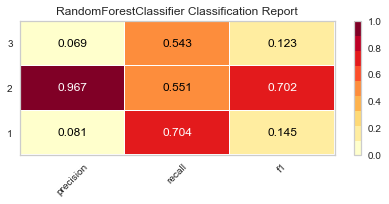

In [ ]:
mapping = {1: "Faible", 2: "Moyen", 3:"Excellent"}
import matplotlib.pyplot as plt
from yellowbrick.classifier import (
    ClassificationReport,
)

for model in models:
    fig, ax = plt.subplots(figsize=(6, 3))
    cm_viz = ClassificationReport(
        model,
        label_encoder=mapping
    )
    cm_viz.score(X_test, y_test)
    cm_viz.poof()

Based on the Recall, we can retain that KNeighborsClassifier is a better model for this dataset.

### Model optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
knn_cls = KNeighborsClassifier()
params = {
    "n_neighbors": [4,5,6],
    "weights": ['uniform', 'distance'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size": [25,30,35],
    "p":[1,2,3],
    }
cv = GridSearchCV(
    knn_cls, 
    params, 
    n_jobs=-1
).fit(X_train, y_train)
print(cv.best_params_)

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 5, 'p': 3, 'weights': 'distance'}


#### Modeling with best params:

In [ ]:
knn_cls_best = KNeighborsClassifier(**cv.best_params_)
knn_cls_best.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=25, p=3, weights='distance')

In [ ]:
knn_cls_best.score(X_train, y_train)

1.0

In [ ]:
knn_cls_best.score(X_test, y_test)

0.9517326732673267